<a href="https://colab.research.google.com/github/olgavel1998/Rschool/blob/main/Dimensio_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
raw_data = pd.read_csv('Loan_status_2007-2020Q3.gzip')
raw_data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320613,89896,113864779,2000.0,2000.0,2000.0,36 months,21.45%,75.82,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
320614,89897,112209947,4800.0,4800.0,4800.0,36 months,10.91%,156.95,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
320615,89898,113195147,24000.0,24000.0,24000.0,60 months,7.97%,486.29,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
320616,89899,113819989,16000.0,16000.0,16000.0,36 months,16.02%,562.68,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [ ]:
print("Number of Columns: ", len(list(raw_data.columns)))
print("Number of rows: ", len(raw_data))

Number of Columns:  142
Number of rows:  320618


- - We see that we have `142 columns` and `2.9 million rows`. This is a pretty large data set to work with on most machines, so it’s a great candidate __for dimensionality reduction__. 

In [ ]:
raw_data.dtypes

Unnamed: 0                                      int64
id                                             object
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
                                               ...   
hardship_loan_status                           object
orig_projected_additional_accrued_interest    float64
hardship_payoff_balance_amount                float64
hardship_last_payment_amount                  float64
debt_settlement_flag                           object
Length: 142, dtype: object

In [ ]:
raw_data['purpose']

0                credit_card
1                        car
2             small_business
3                      other
4                      other
                 ...        
320613                 house
320614    debt_consolidation
320615    debt_consolidation
320616    debt_consolidation
320617                   NaN
Name: purpose, Length: 320618, dtype: object

In [ ]:
#filter our data to only have credit card repayment loans
raw_data = raw_data[raw_data['purpose'] == 'credit_card']
raw_data

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
13,13,1069866,3000.0,3000.0,3000.0,36 months,9.91%,96.68,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
22,22,1069710,10000.0,10000.0,10000.0,36 months,11.71%,330.76,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
25,25,1069697,15000.0,15000.0,15000.0,36 months,9.91%,483.38,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
29,29,1047704,8500.0,8500.0,8500.0,36 months,11.71%,281.15,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320591,89874,113874369,14000.0,14000.0,14000.0,60 months,9.93%,296.98,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
320593,89876,113906218,12000.0,12000.0,12000.0,36 months,10.42%,389.58,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
320594,89877,114163577,2800.0,2800.0,2800.0,36 months,9.44%,89.62,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
320600,89883,113833155,5600.0,5600.0,5600.0,36 months,12.62%,187.67,C,C1,...,Feb-2019,Mar-2019,Feb-2019,3.0,25.0,Late (16-30 days),NaN,3294.7,42.41,N


- Let’s also take a small subset of the columns

In [ ]:
columns = ['loan_amnt', 'loan_status','funded_amnt', 
'funded_amnt_inv', 'term', 
'int_rate','mths_since_recent_revol_delinq','home_ownership', 
'verification_status',
 'num_accts_ever_120_pd', 'num_actv_bc_tl', 
'num_actv_rev_tl', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
'chargeoff_within_12_mths', 'delinq_amnt', 'last_fico_range_low', 
'last_fico_range_high']

df = raw_data[columns]
df

,loan_amnt,loan_status,funded_amnt,funded_amnt_inv,term,int_rate,mths_since_recent_revol_delinq,home_ownership,verification_status,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,last_fico_range_low,last_fico_range_high
0,5000.0,Fully Paid,5000.0,4975.0,36 months,10.65%,NaN,RENT,Verified,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,700.0,704.0
13,3000.0,Fully Paid,3000.0,3000.0,36 months,9.91%,NaN,RENT,Source Verified,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,650.0,654.0
22,10000.0,Fully Paid,10000.0,10000.0,36 months,11.71%,NaN,OWN,Source Verified,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,720.0,724.0
25,15000.0,Fully Paid,15000.0,15000.0,36 months,9.91%,NaN,MORTGAGE,Verified,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,730.0,734.0
29,8500.0,Fully Paid,8500.0,8500.0,36 months,11.71%,NaN,RENT,Source Verified,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,595.0,599.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320591,14000.0,Fully Paid,14000.0,14000.0,60 months,9.93%,NaN,RENT,Not Verified,0.0,4.0,4.0,4373.0,10967.0,63.9,0.0,0.0,785.0,789.0
320593,12000.0,Fully Paid,12000.0,12000.0,36 months,10.42%,7.0,MORTGAGE,Source Verified,2.0,2.0,3.0,13597.0,561.0,96.2,0.0,0.0,655.0,659.0
320594,2800.0,Fully Paid,2800.0,2800.0,36 months,9.44%,NaN,MORTGAGE,Not Verified,0.0,2.0,3.0,2893.0,11923.0,23.6,0.0,0.0,665.0,669.0
320600,5600.0,Charged Off,5600.0,5600.0,36 months,12.62%,NaN,RENT,Verified,0.0,4.0,5.0,1876.0,2031.0,71.8,0.0,0.0,500.0,504.0


- Write the filtered data frame to a new csv file that we will call __credit_card_loans.csv__

In [ ]:
df.to_csv("credit_card_loan.csv", index=False)
df_credit = pd.read_csv("credit_card_loan.csv")
df_credit

,loan_amnt,loan_status,funded_amnt,funded_amnt_inv,term,int_rate,mths_since_recent_revol_delinq,home_ownership,verification_status,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,last_fico_range_low,last_fico_range_high
0,5000.0,Fully Paid,5000.0,4975.0,36 months,10.65%,NaN,RENT,Verified,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,700.0,704.0
1,3000.0,Fully Paid,3000.0,3000.0,36 months,9.91%,NaN,RENT,Source Verified,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,650.0,654.0
2,10000.0,Fully Paid,10000.0,10000.0,36 months,11.71%,NaN,OWN,Source Verified,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,720.0,724.0
3,15000.0,Fully Paid,15000.0,15000.0,36 months,9.91%,NaN,MORTGAGE,Verified,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,730.0,734.0
4,8500.0,Fully Paid,8500.0,8500.0,36 months,11.71%,NaN,RENT,Source Verified,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,595.0,599.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66060,14000.0,Fully Paid,14000.0,14000.0,60 months,9.93%,NaN,RENT,Not Verified,0.0,4.0,4.0,4373.0,10967.0,63.9,0.0,0.0,785.0,789.0
66061,12000.0,Fully Paid,12000.0,12000.0,36 months,10.42%,7.0,MORTGAGE,Source Verified,2.0,2.0,3.0,13597.0,561.0,96.2,0.0,0.0,655.0,659.0
66062,2800.0,Fully Paid,2800.0,2800.0,36 months,9.44%,NaN,MORTGAGE,Not Verified,0.0,2.0,3.0,2893.0,11923.0,23.6,0.0,0.0,665.0,669.0
66063,5600.0,Charged Off,5600.0,5600.0,36 months,12.62%,NaN,RENT,Verified,0.0,4.0,5.0,1876.0,2031.0,71.8,0.0,0.0,500.0,504.0


In [ ]:
print("Number of Columns: ", len(list(df_credit.columns)))
print("Number of rows: ", len(df_credit))

Number of Columns:  19
Number of rows:  66065


- We still need to do a bit more data prep. Notice some columns have missing values — NaN means not a number.

In [ ]:
def fill_na(numerical_column):       
    df_credit[numerical_column].fillna(df_credit[numerical_column].mean(), inplace=True)
fill_na('mths_since_recent_revol_delinq')
fill_na('num_accts_ever_120_pd')
fill_na('num_actv_bc_tl')
fill_na('num_actv_rev_tl')
fill_na('avg_cur_bal')
fill_na('bc_open_to_buy')
fill_na('bc_util')

In [ ]:
print(df_credit.head())

   loan_amnt loan_status  funded_amnt  funded_amnt_inv        term int_rate  \
0     5000.0  Fully Paid       5000.0           4975.0   36 months   10.65%   
1     3000.0  Fully Paid       3000.0           3000.0   36 months    9.91%   
2    10000.0  Fully Paid      10000.0          10000.0   36 months   11.71%   
3    15000.0  Fully Paid      15000.0          15000.0   36 months    9.91%   
4     8500.0  Fully Paid       8500.0           8500.0   36 months   11.71%   

   mths_since_recent_revol_delinq home_ownership verification_status  \
0                       36.245079           RENT            Verified   
1                       36.245079           RENT     Source Verified   
2                       36.245079            OWN     Source Verified   
3                       36.245079       MORTGAGE            Verified   
4                       36.245079           RENT     Source Verified   

   num_accts_ever_120_pd  num_actv_bc_tl  num_actv_rev_tl   avg_cur_bal  \
0               0

- Let’s convert the categorical columns into codes that are machine-readable

__the home ownership__, __term__, and __verification status__  columns have corresponding categorical columns. The first method we’ll look at is using `random forests` feature importance to reduce dimensionality. Generate labels from the loan_status columns

In [ ]:
#The unique set of values for loan status
print(set(df_credit["loan_status"]))

{'Current', 'Default', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)', 'Charged Off', 'In Grace Period', 'Fully Paid'}


In [ ]:
# the loan status outcomes fully paid and default/charged off
df_credit = df_credit[df_credit['loan_status'].isin(['Fully Paid', 'Default', 'Charged Off'])]
df_credit

,loan_amnt,loan_status,funded_amnt,funded_amnt_inv,term,int_rate,mths_since_recent_revol_delinq,home_ownership,verification_status,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,last_fico_range_low,last_fico_range_high
0,5000.0,Fully Paid,5000.0,4975.0,36 months,10.65%,36.245079,RENT,Verified,0.324165,4.085526,5.951471,13333.418697,9741.211793,66.62455,0.0,0.0,700.0,704.0
1,3000.0,Fully Paid,3000.0,3000.0,36 months,9.91%,36.245079,RENT,Source Verified,0.324165,4.085526,5.951471,13333.418697,9741.211793,66.62455,0.0,0.0,650.0,654.0
2,10000.0,Fully Paid,10000.0,10000.0,36 months,11.71%,36.245079,OWN,Source Verified,0.324165,4.085526,5.951471,13333.418697,9741.211793,66.62455,0.0,0.0,720.0,724.0
3,15000.0,Fully Paid,15000.0,15000.0,36 months,9.91%,36.245079,MORTGAGE,Verified,0.324165,4.085526,5.951471,13333.418697,9741.211793,66.62455,0.0,0.0,730.0,734.0
4,8500.0,Fully Paid,8500.0,8500.0,36 months,11.71%,36.245079,RENT,Source Verified,0.324165,4.085526,5.951471,13333.418697,9741.211793,66.62455,0.0,0.0,595.0,599.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66058,6000.0,Fully Paid,6000.0,6000.0,36 months,7.97%,57.000000,RENT,Source Verified,0.000000,3.000000,5.000000,1327.000000,14588.000000,20.30000,0.0,0.0,650.0,654.0
66060,14000.0,Fully Paid,14000.0,14000.0,60 months,9.93%,36.245079,RENT,Not Verified,0.000000,4.000000,4.000000,4373.000000,10967.000000,63.90000,0.0,0.0,785.0,789.0
66061,12000.0,Fully Paid,12000.0,12000.0,36 months,10.42%,7.000000,MORTGAGE,Source Verified,2.000000,2.000000,3.000000,13597.000000,561.000000,96.20000,0.0,0.0,655.0,659.0
66062,2800.0,Fully Paid,2800.0,2800.0,36 months,9.44%,36.245079,MORTGAGE,Not Verified,0.000000,2.000000,3.000000,2893.000000,11923.000000,23.60000,0.0,0.0,665.0,669.0


- Create binary labels for these loan status outcomes. A value of one will correspond to default/charged off, meaning the loan wasn’t paid off and has gone into collections, and zero means the loan was fully paid off.

In [ ]:
df_credit['loan_status_label'] = np.where(df_credit['loan_status'] == 'Fully Paid', 0, 1)
print(df_credit.head()) 

   loan_amnt loan_status  funded_amnt  funded_amnt_inv        term int_rate  \
0     5000.0  Fully Paid       5000.0           4975.0   36 months   10.65%   
1     3000.0  Fully Paid       3000.0           3000.0   36 months    9.91%   
2    10000.0  Fully Paid      10000.0          10000.0   36 months   11.71%   
3    15000.0  Fully Paid      15000.0          15000.0   36 months    9.91%   
4     8500.0  Fully Paid       8500.0           8500.0   36 months   11.71%   

   mths_since_recent_revol_delinq home_ownership verification_status  \
0                       36.245079           RENT            Verified   
1                       36.245079           RENT     Source Verified   
2                       36.245079            OWN     Source Verified   
3                       36.245079       MORTGAGE            Verified   
4                       36.245079           RENT     Source Verified   

   num_accts_ever_120_pd  num_actv_bc_tl  num_actv_rev_tl   avg_cur_bal  \
0               0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


-  let’s filter the columns in our data frame so we only have columns with machine-readable values

In [ ]:
columns2 = ['loan_amnt', 'loan_status_label', 'funded_amnt', 
'funded_amnt_inv', 
'int_rate','mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 
'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
'chargeoff_within_12_mths', 'delinq_amnt', 'last_fico_range_low', 
'last_fico_range_high']
df_credit = df_credit[columns2]
print(df_credit.head()) 

   loan_amnt  loan_status_label  funded_amnt  funded_amnt_inv int_rate  \
0     5000.0                  0       5000.0           4975.0   10.65%   
1     3000.0                  0       3000.0           3000.0    9.91%   
2    10000.0                  0      10000.0          10000.0   11.71%   
3    15000.0                  0      15000.0          15000.0    9.91%   
4     8500.0                  0       8500.0           8500.0   11.71%   

   mths_since_recent_revol_delinq  num_accts_ever_120_pd  num_actv_bc_tl  \
0                       36.245079               0.324165        4.085526   
1                       36.245079               0.324165        4.085526   
2                       36.245079               0.324165        4.085526   
3                       36.245079               0.324165        4.085526   
4                       36.245079               0.324165        4.085526   

   num_actv_rev_tl   avg_cur_bal  bc_open_to_buy   bc_util  \
0         5.951471  13333.418697    

- let’s convert the interest rate column into a numerical column

In [ ]:
df_credit['int_rate'] = df_credit['int_rate'].str.rstrip('%')
df_credit['int_rate'] = df_credit['int_rate'].astype(float)
df_credit.fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [ ]:
df_credit

,loan_amnt,loan_status_label,funded_amnt,funded_amnt_inv,int_rate,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,last_fico_range_low,last_fico_range_high
0,5000.0,0,5000.0,4975.0,10.65,36.245079,0.324165,4.085526,5.951471,13333.418697,9741.211793,66.62455,0.0,0.0,700.0,704.0
1,3000.0,0,3000.0,3000.0,9.91,36.245079,0.324165,4.085526,5.951471,13333.418697,9741.211793,66.62455,0.0,0.0,650.0,654.0
2,10000.0,0,10000.0,10000.0,11.71,36.245079,0.324165,4.085526,5.951471,13333.418697,9741.211793,66.62455,0.0,0.0,720.0,724.0
3,15000.0,0,15000.0,15000.0,9.91,36.245079,0.324165,4.085526,5.951471,13333.418697,9741.211793,66.62455,0.0,0.0,730.0,734.0
4,8500.0,0,8500.0,8500.0,11.71,36.245079,0.324165,4.085526,5.951471,13333.418697,9741.211793,66.62455,0.0,0.0,595.0,599.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66058,6000.0,0,6000.0,6000.0,7.97,57.000000,0.000000,3.000000,5.000000,1327.000000,14588.000000,20.30000,0.0,0.0,650.0,654.0
66060,14000.0,0,14000.0,14000.0,9.93,36.245079,0.000000,4.000000,4.000000,4373.000000,10967.000000,63.90000,0.0,0.0,785.0,789.0
66061,12000.0,0,12000.0,12000.0,10.42,7.000000,2.000000,2.000000,3.000000,13597.000000,561.000000,96.20000,0.0,0.0,655.0,659.0
66062,2800.0,0,2800.0,2800.0,9.44,36.245079,0.000000,2.000000,3.000000,2893.000000,11923.000000,23.60000,0.0,0.0,665.0,669.0


# Random Forest

- A tree-based ensemble algorithm that constructs a series of tree data structures and asks yes-or-no questions about the statistics in the data. Each of these trees makes a prediction based on the answers, and the trees are combined to make a single prediction. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

- Define our input and output and split our data for training and testing. This step is necessary so that we don’t overfit to noise in our training data and ensures that our model can generalize well when we make predictions on future data. 

In [ ]:
X = df_credit[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate','mths_since_recent_revol_delinq',
'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 
'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
'chargeoff_within_12_mths', 'delinq_amnt', 'last_fico_range_low', 
'last_fico_range_high']]
y = df_credit['loan_status_label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.33)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39497, 15)
(19454, 15)
(39497,)
(19454,)


- Let’s fit our random forest model to the training data and generate a plot for feature importance

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
features = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate','mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 
'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
'chargeoff_within_12_mths', 'delinq_amnt', 'last_fico_range_low', 
'last_fico_range_high']
features.__len__()

15

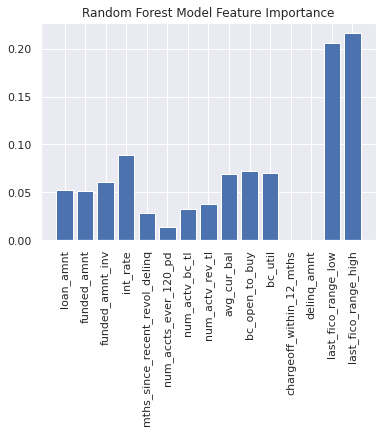

In [ ]:
feature_df = pd.DataFrame({"Importance":model.feature_importances_, 
"Features": features })
sns.set()
plt.bar(feature_df["Features"], feature_df["Importance"])
plt.xticks(rotation=90)
plt.title("Random Forest Model Feature Importance")
plt.show()

- We see that the FICO scores, interest rate, and current balance are the three most important features. We can clearly use the random forest feature importance to narrow down which factors to consider when predicting credit risk. 

- The downside with this method is that it assumes we have labels. Here, it is loan status. Often, though, we can find use cases in which we’d like to narrow down a large list of columns in data without having any labels. The most common technique for this approach is principal component analysis. 

# Principal Component Analysis 

- Principal component analysis works by finding a smaller set of column values from an uncorrelated larger set. This method works by representing independent, uncorrelated features as a sum of the original features. 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df_credit[features]

- let’s scale our data using the standardScaler method. 

In [ ]:
X = df_credit[features]
scaler = StandardScaler()

scaler.fit(X)
X_scaled=scaler.transform(X)

- let’s define a PCA object with four components, fit to X_scaled, then generate our components:

In [ ]:
pca=PCA(n_components=4) 
pca.fit(X_scaled)
X_components=pca.transform(X_scaled) 

- We can then store the component in a Pandas data frame

In [ ]:
components_df = pd.DataFrame({'component_one': 
list(X_components[:,0]), 'component_two': list(X_components[:,1]),
                              'component_three': 
list(X_components[:,2]), 'component_four': list(X_components[:,3])})

print(components_df.head())


   component_one  component_two  component_three  component_four
0      -1.927367       0.264746        -0.459214       -0.271248
1      -2.367839      -0.206334        -0.578811        0.206293
2      -0.866040       0.458707        -0.217308       -0.395418
3       0.089214       0.825276        -0.048863       -0.311080
4      -1.192242      -0.831062        -0.326415        0.806866


- we’ll store the class in a variable called labels and define some variables that we’ll use for formatting our plot

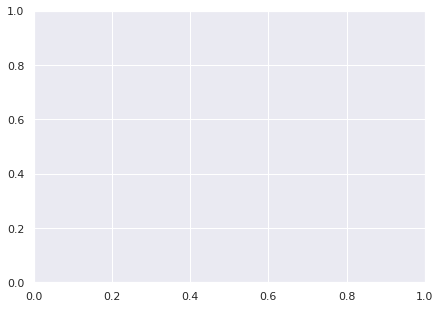

In [ ]:
#labels=loan_status_
color_dict={0:'Red',1:'Blue'}
fig,ax=plt.subplots(figsize=(7,5))

- generate our scatter plot and add axes labels and a title. We will look at a scatter plot of the first two components

In [ ]:
for i in np.unique(labels):   
index=np.where(labels==i)   ax.scatter(components_df['component_one'].loc[index],components_df['component_two'].loc[index],c=color_dict[i],s=10,
           label=i)
 
 
plt.xlabel("1st Component",fontsize=14)
plt.ylabel("2nd Component",fontsize=14)
plt.title('Scatter plot of Principal Components')
plt.legend()
plt.show()

- We can see a distinct separation between classes in our scatter plot. Although we have labels that we can use for a sanity check for our PCA algorithm, in practice, PCA is used in an unsupervised manner. This means we can use these methods to explore distinct clusters for any column we are interested in. 

- For example, we can explore clusters in credit scores or even income. Cluster analysis of these values may be useful for lenders because it allows them to consider creditworthy borrowers who would otherwise be denied a loan. An example is a recent graduate student with a low credit score who recently got a job in the tech industry with a high-six-figure salary. While the borrower was in graduate school, they may have had trouble paying off loans, but they may now be creditworthy upon starting their new job. 

- This type of cluster analysis can help detect these borrowers who would otherwise be denied for a loan which can translate to higher revenue for lenders. PCA is very powerful in this sense since it can allow you to analyze distinct groups in your data without requiring any predefined labels.